## NOAA Precipitation data ETA

In [1]:
## import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')


In [16]:
## lets load the data and see what we have
file_path = 'Raw_data.csv'
df = pd.read_csv(file_path)


In [17]:
df.head()

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,MDSF,MDSF_ATTRIBUTES,PRCP,...,WT17,WT17_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES
0,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2005-01-02,NaN,NaN,NaN,NaN,NaN,NaN,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2005-01-04,NaN,NaN,NaN,NaN,NaN,NaN,7.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2005-01-05,NaN,NaN,NaN,NaN,NaN,NaN,2.5,...,NaN,NaN,1.0,",,0",NaN,NaN,NaN,NaN,1.0,",,X"


In [18]:
# # Get dataset dimensions
# print("\nDataset shape:", df.shape)

# Check data types
print("\nData types:")
print(df.dtypes)

# Get statistical summary
print("\nStatistical summary:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nMissing values percentage:")
print(df.isnull().mean() * 100)

# # Check unique values in categorical columns
# print("\nUnique stations:", df['STATION'].nunique())
# print("\nUnique names:", df['NAME'].nunique())

# # Check date range
# print("\nDate range:")
# print("First date:", df['DATE'].min())
# print("Last date:", df['DATE'].max())


Data types:
STATION             object
NAME                object
DATE                object
DAPR               float64
DAPR_ATTRIBUTES     object
                    ...   
WT19_ATTRIBUTES     object
WT21               float64
WT21_ATTRIBUTES     object
WT22               float64
WT22_ATTRIBUTES     object
Length: 61, dtype: object

Statistical summary:
            STATION                                       NAME        DATE  \
count         13506                                      13506       13506   
unique            2                                          2        7305   
top     USW00014739  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US  2015-01-01   
freq           7305                                       7305           2   
mean            NaN                                        NaN         NaN   
std             NaN                                        NaN         NaN   
min             NaN                                        NaN         NaN   
25%             Na

In [19]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Display missing values
print(missing_values)

STATION                0
NAME                   0
DATE                   0
DAPR               13487
DAPR_ATTRIBUTES    13487
                   ...  
WT19_ATTRIBUTES    13491
WT21               13505
WT21_ATTRIBUTES    13505
WT22               13459
WT22_ATTRIBUTES    13459
Length: 61, dtype: int64


In [20]:
weather_df = df[['STATION', 'NAME', 'DATE', 'TMAX', 'TMIN', 'PRCP', 'TAVG']].copy()
weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])
weather_df['TAVG'] =  weather_df['TAVG'].fillna((weather_df['TMAX'] + weather_df['TMIN']) / 2)
cleaned_df = weather_df.dropna(subset=['TAVG','PRCP', 'TMAX', 'TMIN', 'STATION', 'NAME', 'DATE'])
print(cleaned_df.info())
print(cleaned_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 13285 entries, 0 to 13505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  13285 non-null  object        
 1   NAME     13285 non-null  object        
 2   DATE     13285 non-null  datetime64[ns]
 3   TMAX     13285 non-null  float64       
 4   TMIN     13285 non-null  float64       
 5   PRCP     13285 non-null  float64       
 6   TAVG     13285 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 830.3+ KB
None
       STATION                                       NAME       DATE  TMAX  \
0  USW00014739  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US 2005-01-01  11.1   
1  USW00014739  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US 2005-01-02   4.4   
2  USW00014739  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US 2005-01-03  11.7   
3  USW00014739  BOSTON LOGAN INTERNATIONAL AIRPORT, MA US 2005-01-04   7.2   
4  USW00014739  BOSTON L

In [21]:
cleaned_df

,STATION,NAME,DATE,TMAX,TMIN,PRCP,TAVG
0,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2005-01-01,11.1,1.1,0.0,6.10
1,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2005-01-02,4.4,-2.2,0.5,1.10
2,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2005-01-03,11.7,4.4,4.6,8.30
3,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2005-01-04,7.2,2.8,7.4,5.00
4,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2005-01-05,4.4,-2.8,2.5,1.10
...,...,...,...,...,...,...,...
13501,USC00193890,"JAMAICA PLAIN, MA US",2024-12-27,4.4,-8.9,0.0,-2.25
13502,USC00193890,"JAMAICA PLAIN, MA US",2024-12-28,6.1,-6.7,0.5,-0.30
13503,USC00193890,"JAMAICA PLAIN, MA US",2024-12-29,6.1,1.7,2.0,3.90
13504,USC00193890,"JAMAICA PLAIN, MA US",2024-12-30,13.9,4.4,7.1,9.15


In [22]:

# Count and list unique stations
unique_stations = cleaned_df['STATION'].nunique()
station_names = cleaned_df['NAME'].unique()

print(f"Number of unique stations: {unique_stations}")
print("Station names:")
for name in station_names:
    print("-", name)


Number of unique stations: 2
Station names:
- BOSTON LOGAN INTERNATIONAL AIRPORT, MA US
- JAMAICA PLAIN, MA US


In [23]:
# Step 1: Keep relevant columns only
pivot_df = cleaned_df[['DATE', 'STATION', 'TAVG', 'PRCP']].copy()

# Step 2: Pivot to wide format
pivoted = pivot_df.pivot(index='DATE', columns='STATION', values=['TAVG', 'PRCP'])

# Step 3: Flatten MultiIndex column names
pivoted.columns = [f"{metric}_{station}" for metric, station in pivoted.columns]

# Step 4: Reset index to bring DATE back as a column
pivoted.reset_index(inplace=True)

# Show the result
print(pivoted)


           DATE  TAVG_USC00193890  TAVG_USW00014739  PRCP_USC00193890  \
0    2005-01-01               NaN               6.1               NaN   
1    2005-01-02               NaN               1.1               NaN   
2    2005-01-03               NaN               8.3               NaN   
3    2005-01-04               NaN               5.0               NaN   
4    2005-01-05               NaN               1.1               NaN   
...         ...               ...               ...               ...   
7300 2024-12-27             -2.25              -0.4               0.0   
7301 2024-12-28             -0.30               2.9               0.5   
7302 2024-12-29              3.90               6.6               2.0   
7303 2024-12-30              9.15              11.4               7.1   
7304 2024-12-31              7.75               7.3               8.9   

      PRCP_USW00014739  
0                  0.0  
1                  0.5  
2                  4.6  
3                  7.4 

In [24]:
# Create new columns for average of both stations (row-wise mean)
pivoted['Avg_Temp'] = pivoted[['TAVG_USW00014739', 'TAVG_USC00193890']].mean(axis=1, skipna=True)
pivoted['Avg_Precip'] = pivoted[['PRCP_USW00014739', 'PRCP_USC00193890']].mean(axis=1, skipna=True)

# Preview
print(pivoted)


           DATE  TAVG_USC00193890  TAVG_USW00014739  PRCP_USC00193890  \
0    2005-01-01               NaN               6.1               NaN   
1    2005-01-02               NaN               1.1               NaN   
2    2005-01-03               NaN               8.3               NaN   
3    2005-01-04               NaN               5.0               NaN   
4    2005-01-05               NaN               1.1               NaN   
...         ...               ...               ...               ...   
7300 2024-12-27             -2.25              -0.4               0.0   
7301 2024-12-28             -0.30               2.9               0.5   
7302 2024-12-29              3.90               6.6               2.0   
7303 2024-12-30              9.15              11.4               7.1   
7304 2024-12-31              7.75               7.3               8.9   

      PRCP_USW00014739  Avg_Temp  Avg_Precip  
0                  0.0     6.100        0.00  
1                  0.5     1.

In [25]:
pivoted['WEEK'] = pivoted['DATE'].dt.to_period('W').apply(lambda r: r.start_time)
pivoted.head(10)

,DATE,TAVG_USC00193890,TAVG_USW00014739,PRCP_USC00193890,PRCP_USW00014739,Avg_Temp,Avg_Precip,WEEK
0,2005-01-01,NaN,6.1,NaN,0.0,6.1,0.0,2004-12-27
1,2005-01-02,NaN,1.1,NaN,0.5,1.1,0.5,2004-12-27
2,2005-01-03,NaN,8.3,NaN,4.6,8.3,4.6,2005-01-03
3,2005-01-04,NaN,5.0,NaN,7.4,5.0,7.4,2005-01-03
4,2005-01-05,NaN,1.1,NaN,2.5,1.1,2.5,2005-01-03
5,2005-01-06,NaN,0.0,NaN,16.3,0.0,16.3,2005-01-03
6,2005-01-07,NaN,1.7,NaN,0.0,1.7,0.0,2005-01-03
7,2005-01-08,NaN,0.0,NaN,14.7,0.0,14.7,2005-01-03
8,2005-01-09,NaN,-1.7,NaN,0.0,-1.7,0.0,2005-01-03
9,2005-01-10,NaN,2.2,NaN,0.0,2.2,0.0,2005-01-10


In [26]:
weekly_summary = pivoted.groupby('WEEK').agg({
    'Avg_Temp': 'mean',
    'Avg_Precip': 'sum'
}).reset_index()

weekly_summary.head(10)

,WEEK,Avg_Temp,Avg_Precip
0,2004-12-27,3.600000,0.5
1,2005-01-03,2.057143,45.5
2,2005-01-10,2.300000,21.4
3,2005-01-17,-9.842857,38.2
4,2005-01-24,-7.257143,7.6
5,2005-01-31,-0.942857,6.8
6,2005-02-07,2.057143,22.9
7,2005-02-14,0.328571,13.7
8,2005-02-21,-3.014286,18.8
9,2005-02-28,-1.514286,21.6


In [27]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 0
    elif month in [3, 4, 5]:
        return 1
    elif month in [6, 7, 8]:
        return 2
    else:
        return 3

# Apply season mapping
weekly_summary['Season'] = weekly_summary['WEEK'].apply(get_season)

# Final preview
weekly_summary.head(20)


,WEEK,Avg_Temp,Avg_Precip,Season
0,2004-12-27,3.600000,0.5,0
1,2005-01-03,2.057143,45.5,0
2,2005-01-10,2.300000,21.4,0
3,2005-01-17,-9.842857,38.2,0
4,2005-01-24,-7.257143,7.6,0
5,2005-01-31,-0.942857,6.8,0
6,2005-02-07,2.057143,22.9,0
7,2005-02-14,0.328571,13.7,0
8,2005-02-21,-3.014286,18.8,0
9,2005-02-28,-1.514286,21.6,0


In [28]:
weekly_summary

,WEEK,Avg_Temp,Avg_Precip,Season
0,2004-12-27,3.600000,0.50,0
1,2005-01-03,2.057143,45.50,0
2,2005-01-10,2.300000,21.40,0
3,2005-01-17,-9.842857,38.20,0
4,2005-01-24,-7.257143,7.60,0
...,...,...,...,...
1040,2024-12-02,0.271429,12.15,0
1041,2024-12-09,2.125000,87.45,0
1042,2024-12-16,1.992857,37.85,0
1043,2024-12-23,-1.732143,2.80,0


In [29]:
# Season is already assigned properly and doesn't need shifting
# Target is just next week's precip, already assigned

# Add lagged features for temperature and precipitation
for lag in range(1, 13):
    weekly_summary[f'Avg_Temp_t-{lag}'] = weekly_summary['Avg_Temp'].shift(lag)
    weekly_summary[f'Avg_Precip_t-{lag}'] = weekly_summary['Avg_Precip'].shift(lag)

# Optionally, drop rows with NaNs introduced by shifting
weekly_summary = weekly_summary.dropna().reset_index(drop=True)


weekly_summary

,WEEK,Avg_Temp,Avg_Precip,Season,Avg_Temp_t-1,Avg_Precip_t-1,Avg_Temp_t-2,Avg_Precip_t-2,Avg_Temp_t-3,Avg_Precip_t-3,...,Avg_Temp_t-8,Avg_Precip_t-8,Avg_Temp_t-9,Avg_Precip_t-9,Avg_Temp_t-10,Avg_Precip_t-10,Avg_Temp_t-11,Avg_Precip_t-11,Avg_Temp_t-12,Avg_Precip_t-12
0,2005-03-21,3.957143,4.80,1,3.714286,0.00,-1.271429,33.20,-1.514286,21.60,...,-7.257143,7.60,-9.842857,38.20,2.300000,21.40,2.057143,45.50,3.600000,0.50
1,2005-03-28,6.442857,77.50,1,3.957143,4.80,3.714286,0.00,-1.271429,33.20,...,-0.942857,6.80,-7.257143,7.60,-9.842857,38.20,2.300000,21.40,2.057143,45.50
2,2005-04-04,10.400000,7.30,1,6.442857,77.50,3.957143,4.80,3.714286,0.00,...,2.057143,22.90,-0.942857,6.80,-7.257143,7.60,-9.842857,38.20,2.300000,21.40
3,2005-04-11,6.585714,0.80,1,10.400000,7.30,6.442857,77.50,3.957143,4.80,...,0.328571,13.70,2.057143,22.90,-0.942857,6.80,-7.257143,7.60,-9.842857,38.20
4,2005-04-18,12.528571,22.60,1,6.585714,0.80,10.400000,7.30,6.442857,77.50,...,-3.014286,18.80,0.328571,13.70,2.057143,22.90,-0.942857,6.80,-7.257143,7.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,2024-12-02,0.271429,12.15,0,4.135714,26.80,8.535714,61.75,7.900000,2.25,...,13.067857,10.35,16.239286,0.00,16.989286,9.25,18.228571,25.50,19.860714,0.00
1029,2024-12-09,2.125000,87.45,0,0.271429,12.15,4.135714,26.80,8.535714,61.75,...,9.939286,5.90,13.067857,10.35,16.239286,0.00,16.989286,9.25,18.228571,25.50
1030,2024-12-16,1.992857,37.85,0,2.125000,87.45,0.271429,12.15,4.135714,26.80,...,15.367857,0.00,9.939286,5.90,13.067857,10.35,16.239286,0.00,16.989286,9.25
1031,2024-12-23,-1.732143,2.80,0,1.992857,37.85,2.125000,87.45,0.271429,12.15,...,11.700000,5.95,15.367857,0.00,9.939286,5.90,13.067857,10.35,16.239286,0.00


In [60]:
# weekly_summary['Avg_Temp_t-2'] = weekly_summary['Avg_Temp'].shift(2)
# weekly_summary['Avg_Precip_t-2'] = weekly_summary['Avg_Precip'].shift(2)

# weekly_summary.head(20)

,WEEK,Avg_Temp,Avg_Precip,Season,Avg_Temp_t-1,Avg_Precip_t-1,Target_Precip,Avg_Temp_t-2,Avg_Precip_t-2
0,2004-12-27,3.600000,0.5,0,NaN,NaN,0.5,NaN,NaN
1,2005-01-03,2.057143,45.5,0,3.600000,0.5,45.5,NaN,NaN
2,2005-01-10,2.300000,21.4,0,2.057143,45.5,21.4,3.600000,0.5
3,2005-01-17,-9.842857,38.2,0,2.300000,21.4,38.2,2.057143,45.5
4,2005-01-24,-7.257143,7.6,0,-9.842857,38.2,7.6,2.300000,21.4
5,2005-01-31,-0.942857,6.8,0,-7.257143,7.6,6.8,-9.842857,38.2
6,2005-02-07,2.057143,22.9,0,-0.942857,6.8,22.9,-7.257143,7.6
7,2005-02-14,0.328571,13.7,0,2.057143,22.9,13.7,-0.942857,6.8
8,2005-02-21,-3.014286,18.8,0,0.328571,13.7,18.8,2.057143,22.9
9,2005-02-28,-1.514286,21.6,0,-3.014286,18.8,21.6,0.328571,13.7


In [32]:
# # Step 3: Drop rows with NaNs due to lagging
# model_df = weekly_summary.dropna(subset=[
#     'Avg_Temp_t-2', 'Avg_Temp_t-1', 'Avg_Temp',
#     'Avg_Precip_t-2', 'Avg_Precip_t-1'
# ]).reset_index(drop=True)

# Step 4: Rearranging columns
model_df = weekly_summary.copy()

# Define column order
ordered_cols = ['Season', 'WEEK']

# Add temperature lags (t-12 to t-1) + current
ordered_cols += [f'Avg_Temp_t-{i}' for i in range(12, 0, -1)]
ordered_cols += ['Avg_Temp']

# Add precipitation lags (t-12 to t-1)
ordered_cols += [f'Avg_Precip_t-{i}' for i in range(12, 0, -1)]

# Add target
ordered_cols += ['Avg_Precip']

# Reorder columns
model_df = model_df[ordered_cols]

# Preview final dataset
model_df


,Season,WEEK,Avg_Temp_t-12,Avg_Temp_t-11,Avg_Temp_t-10,Avg_Temp_t-9,Avg_Temp_t-8,Avg_Temp_t-7,Avg_Temp_t-6,Avg_Temp_t-5,...,Avg_Precip_t-9,Avg_Precip_t-8,Avg_Precip_t-7,Avg_Precip_t-6,Avg_Precip_t-5,Avg_Precip_t-4,Avg_Precip_t-3,Avg_Precip_t-2,Avg_Precip_t-1,Avg_Precip
0,1,2005-03-21,3.600000,2.057143,2.300000,-9.842857,-7.257143,-0.942857,2.057143,0.328571,...,38.20,7.60,6.80,22.90,13.70,18.80,21.60,33.20,0.00,4.80
1,1,2005-03-28,2.057143,2.300000,-9.842857,-7.257143,-0.942857,2.057143,0.328571,-3.014286,...,7.60,6.80,22.90,13.70,18.80,21.60,33.20,0.00,4.80,77.50
2,1,2005-04-04,2.300000,-9.842857,-7.257143,-0.942857,2.057143,0.328571,-3.014286,-1.514286,...,6.80,22.90,13.70,18.80,21.60,33.20,0.00,4.80,77.50,7.30
3,1,2005-04-11,-9.842857,-7.257143,-0.942857,2.057143,0.328571,-3.014286,-1.514286,-1.271429,...,22.90,13.70,18.80,21.60,33.20,0.00,4.80,77.50,7.30,0.80
4,1,2005-04-18,-7.257143,-0.942857,2.057143,0.328571,-3.014286,-1.514286,-1.271429,3.714286,...,13.70,18.80,21.60,33.20,0.00,4.80,77.50,7.30,0.80,22.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0,2024-12-02,19.860714,18.228571,16.989286,16.239286,13.067857,9.939286,15.367857,11.700000,...,0.00,10.35,5.90,0.00,5.95,0.30,2.25,61.75,26.80,12.15
1029,0,2024-12-09,18.228571,16.989286,16.239286,13.067857,9.939286,15.367857,11.700000,12.175000,...,10.35,5.90,0.00,5.95,0.30,2.25,61.75,26.80,12.15,87.45
1030,0,2024-12-16,16.989286,16.239286,13.067857,9.939286,15.367857,11.700000,12.175000,7.900000,...,5.90,0.00,5.95,0.30,2.25,61.75,26.80,12.15,87.45,37.85
1031,0,2024-12-23,16.239286,13.067857,9.939286,15.367857,11.700000,12.175000,7.900000,8.535714,...,0.00,5.95,0.30,2.25,61.75,26.80,12.15,87.45,37.85,2.80


In [33]:
model_df = model_df.rename(columns={'Avg_Precip': 'Target_Precip'})
model_df

,Season,WEEK,Avg_Temp_t-12,Avg_Temp_t-11,Avg_Temp_t-10,Avg_Temp_t-9,Avg_Temp_t-8,Avg_Temp_t-7,Avg_Temp_t-6,Avg_Temp_t-5,...,Avg_Precip_t-9,Avg_Precip_t-8,Avg_Precip_t-7,Avg_Precip_t-6,Avg_Precip_t-5,Avg_Precip_t-4,Avg_Precip_t-3,Avg_Precip_t-2,Avg_Precip_t-1,Target_Precip
0,1,2005-03-21,3.600000,2.057143,2.300000,-9.842857,-7.257143,-0.942857,2.057143,0.328571,...,38.20,7.60,6.80,22.90,13.70,18.80,21.60,33.20,0.00,4.80
1,1,2005-03-28,2.057143,2.300000,-9.842857,-7.257143,-0.942857,2.057143,0.328571,-3.014286,...,7.60,6.80,22.90,13.70,18.80,21.60,33.20,0.00,4.80,77.50
2,1,2005-04-04,2.300000,-9.842857,-7.257143,-0.942857,2.057143,0.328571,-3.014286,-1.514286,...,6.80,22.90,13.70,18.80,21.60,33.20,0.00,4.80,77.50,7.30
3,1,2005-04-11,-9.842857,-7.257143,-0.942857,2.057143,0.328571,-3.014286,-1.514286,-1.271429,...,22.90,13.70,18.80,21.60,33.20,0.00,4.80,77.50,7.30,0.80
4,1,2005-04-18,-7.257143,-0.942857,2.057143,0.328571,-3.014286,-1.514286,-1.271429,3.714286,...,13.70,18.80,21.60,33.20,0.00,4.80,77.50,7.30,0.80,22.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0,2024-12-02,19.860714,18.228571,16.989286,16.239286,13.067857,9.939286,15.367857,11.700000,...,0.00,10.35,5.90,0.00,5.95,0.30,2.25,61.75,26.80,12.15
1029,0,2024-12-09,18.228571,16.989286,16.239286,13.067857,9.939286,15.367857,11.700000,12.175000,...,10.35,5.90,0.00,5.95,0.30,2.25,61.75,26.80,12.15,87.45
1030,0,2024-12-16,16.989286,16.239286,13.067857,9.939286,15.367857,11.700000,12.175000,7.900000,...,5.90,0.00,5.95,0.30,2.25,61.75,26.80,12.15,87.45,37.85
1031,0,2024-12-23,16.239286,13.067857,9.939286,15.367857,11.700000,12.175000,7.900000,8.535714,...,0.00,5.95,0.30,2.25,61.75,26.80,12.15,87.45,37.85,2.80


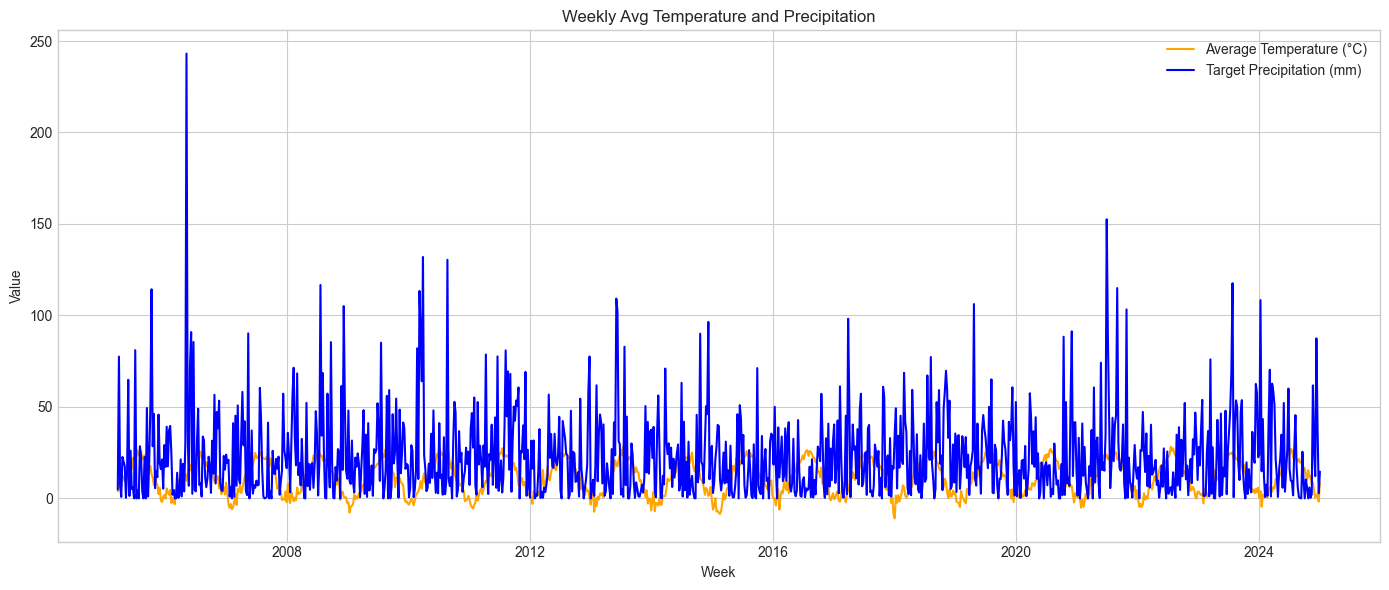

In [34]:
plt.figure(figsize=(14, 6))

# Plot Avg_Temp
plt.plot(model_df['WEEK'], model_df['Avg_Temp'], label='Average Temperature (°C)', color='orange')

# Plot Target_Precip (secondary y-axis)
plt.plot(model_df['WEEK'], model_df['Target_Precip'], label='Target Precipitation (mm)', color='blue')

# Title and labels
plt.title('Weekly Avg Temperature and Precipitation')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [35]:
monthly_summary = model_df.copy()
monthly_summary['MONTH'] = monthly_summary['WEEK'].dt.to_period('M').dt.to_timestamp()
monthly_agg = monthly_summary.groupby('MONTH').agg({
    'Avg_Temp': 'mean',
    'Target_Precip': 'sum'
}).reset_index()

monthly_agg

,MONTH,Avg_Temp,Target_Precip
0,2005-03-01,5.200000,82.30
1,2005-04-01,10.196429,50.90
2,2005-05-01,12.280000,98.70
3,2005-06-01,20.885714,37.10
4,2005-07-01,23.271429,85.60
...,...,...,...
233,2024-08-01,21.408036,69.25
234,2024-09-01,18.192143,34.90
235,2024-10-01,12.518750,22.20
236,2024-11-01,8.186607,91.10


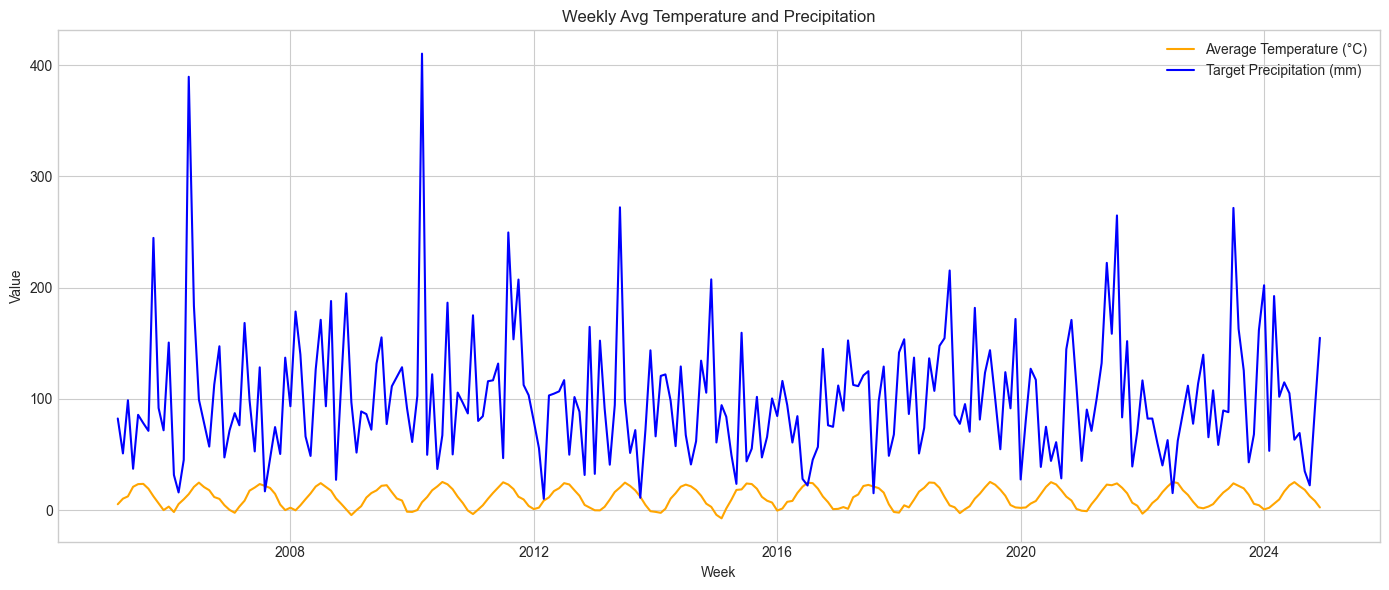

In [36]:
plt.figure(figsize=(14, 6))

# Plot Avg_Temp
plt.plot(monthly_agg['MONTH'], monthly_agg['Avg_Temp'], label='Average Temperature (°C)', color='orange')

# Plot Target_Precip (secondary y-axis)
plt.plot(monthly_agg['MONTH'], monthly_agg['Target_Precip'], label='Target Precipitation (mm)', color='blue')

# Title and labels
plt.title('Weekly Avg Temperature and Precipitation')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [37]:
# Save the modeling DataFrame to a CSV file
model_df.to_csv("model_ready_weekly_weather_12WeekWindow.csv", index=False)

# Confirm
print("✅ File saved as 'model_ready_weekly_weather.csv'")


✅ File saved as 'model_ready_weekly_weather.csv'
